<a href="https://colab.research.google.com/github/chominyeong/Tobigs20/blob/main/1WEEK/Framework/1_Random_Forest_Example%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### matplotlib 한글 폰트 깨짐 방지
### 이 셀 실행시키고 런타임->런타임 다시 시작 한 다음에
### 이 셀은 건너뛰고 아래부터 실행 시키면 됨.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,272 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI/bundang.csv")
df = df.drop(columns=['시군구','단지명','건축년도'])
df.head()

,전용면적,층,경과년수,지하철,대형몰,병원,최고층,총세대수,용적률,건폐율,거래금액
0,42.12,2,23,0.46,0.4,2.2,8,342,422,74,15100
1,50.22,4,23,0.46,0.4,2.2,8,342,422,74,17600
2,42.12,2,23,0.46,0.4,2.2,8,342,422,74,14600
3,84.24,5,23,0.46,0.4,2.2,8,342,422,74,27000
4,42.12,7,23,0.46,0.4,2.2,8,342,422,74,15300


In [ ]:
## 결측개수 확인하기
df.isna().sum()

전용면적    0
층       0
경과년수    0
지하철     0
대형몰     0
병원      0
최고층     0
총세대수    0
용적률     0
건폐율     0
거래금액    0
dtype: int64

(array([  2.,   5.,  21.,  69., 162., 146., 148., 144., 122.,  97., 149.,
         75.,  59.,  59.,  16.,  13.,  14.,  23.,  22.,  34.,  15.,  22.,
         24.,  13.,   8.,  17.,  13.,  15.,   3.,  11.,  15.,  13.,   7.,
         12.,  12.,   5.,   7.,   4.,  12.,   3.,   3.,   7.,   4.,  11.,
          4.,   5.,   6.,   1.,   1.,   2.,   3.,   3.,   1.,   2.,   5.,
          2.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   3.,
          0.,   3.,   0.,   1.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([  8000.,   9870.,  11740.,  13610.,  15480.,  17350.,  19220.,
         21090.,  22960.,  24830.,  26700.,  28570.,  30440.,  32310.,
         34180.,  36050.,  37920.,  39790.,  41660.,  43530.,  45400.,
         47270.,  49140.,  51010.,  52880.,  54750.,  56620.,  58490.,
         60360.,  62230.,  64100.,

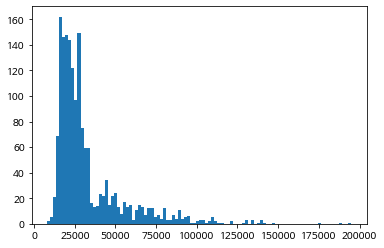

In [ ]:
## x축의 폭을 100으로 설정하여 '거래금액'의 히스토그램 그리기
plt.hist(df['거래금액'],bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  4.,  0.,  0.,  8.,
         3.,  2.,  2., 10.,  8., 13., 29., 37., 41., 59., 36., 30., 52.,
        44., 58., 55., 31., 67., 85., 20., 56., 47., 47., 49., 40., 57.,
        76., 49., 30., 30., 28., 32., 24.,  9., 12., 10.,  5., 18., 12.,
        17., 16., 27., 11., 18., 22., 15.,  6., 16., 10., 15.,  7.,  9.,
        19., 13., 18.,  8.,  9.,  8.,  5., 14.,  6.,  7., 14.,  5.,  8.,
         2.,  4.,  4.,  4.,  7.,  1.,  1.,  1.,  0.,  4.,  3.,  4.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 8.98732181,  9.01925619,  9.05119058,  9.08312496,  9.11505934,
         9.14699372,  9.1789281 ,  9.21086248,  9.24279687,  9.27473125,
         9.30666563,  9.33860001,  9.37053439,  9.40246877,  9.43440315,
         9.46633754,  9.49827192,  9.5302063 ,  9.56214068,  9.59407506,
         9.62600944,  9.65794382,  9.68987821,  9.72181259,  9.75374697,
         9.78568135,  9.81761573,  9.84955011,  9.8814845 ,  9.913418

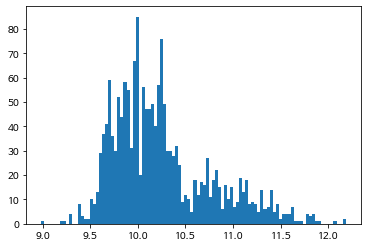

In [ ]:
## 거래금액에 1을 더해 로그변환한 변수를 새로 만들기(0을 로그변환하기 위해 1을 더함)
df['거래금액_log'] = np.log(df['거래금액']+1)

## 기존의 변수 삭제
df = df.drop(columns=['거래금액'])

## 로그변환한 거래금액에 대해 히스토그램 그리기 -> 기존변수보다는 정규분포를 따름
plt.hist(df['거래금액_log'],bins=100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 로그변환을 취한 거래금액을 종속변수로 설정
Y = df['거래금액_log'].values
## 데이터타입 실수로 설정
Y = Y.astype('float32')

## 거래금액을 제외한 나머지 변수를 독립변수로 설정
X = df.drop(columns=['거래금액_log'])
X = X.astype('float32')

## 전체 데이터를 학습데이터(80%)와 검증데이터(20%)로 나눔
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
## 랜덤포레스트회귀 모델 생성(생성할 의사결정 나무 개수는 2000개)
RF_model = RandomForestRegressor(n_estimators=2000, random_state=42)
## 랜포모델 적합시키기
RF_model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [ ]:
## 학습데이터에 대한 예측값
Train_Prediction = (RF_model.predict(X_train))
## 검증데이터에 대한 예측값
Test_Prediction = (RF_model.predict(X_test))

## 학습데이터의 평균절대오차 구하기
RF_Train_MAE = round(np.mean(np.abs(Y_train-Train_Prediction)),3)
## 학습데이터의 퍼센트오차값 구하기
RF_Train_MAPE = round((np.mean(np.abs((Y_train-Train_Prediction)/(Y_train)))*100),3)

## 검증데이터의 평균절대오차 구하기
RF_Test_MAE = round(np.mean(np.abs(Y_test-Test_Prediction)),3)
## 검증데이터의 퍼센트오차값 구하기
RF_Test_MAPE = round((np.mean(np.abs((Y_test-Test_Prediction)/(Y_test)))*100),3)

print("Mean Absolute Error for Train Set is : {:.3f}".format(RF_Train_MAE))
print("Mean Absolute Percent Error for Train Set is : {:.3f} %".format(RF_Train_MAPE))
print("Mean Absolute Error for Test Set is : {:.3f}".format(RF_Test_MAE))
print("Mean Absolute Percent Error for Test Set is : {:.3f} %".format(RF_Test_MAPE))

Mean Absolute Error for Train Set is : 0.025
Mean Absolute Percent Error for Train Set is : 0.242 %
Mean Absolute Error for Test Set is : 0.057
Mean Absolute Percent Error for Test Set is : 0.544 %


In [ ]:
## 검증데이터의 예측값을 지수변환시키기(로그변환의 역변환)
Original_Predictions = (np.round(np.exp(Test_Prediction+1),-2)).astype(int)
print(Original_Predictions[:10])

## 실제값을 지수변환시키기
Original_Values = (np.round(np.exp(Y_test+1),-2)).astype(int)
print(Original_Values[:10])

## 데이터프레임 생성
data = {'Original':  Original_Values,'Prediction': Original_Predictions}
final = pd.DataFrame(data)
final

[ 44500  57300 158300 188800 353700  81700 211400  65500  58200  41900]
[ 45700  59800 154900 182100 312600  59800 201200  59800  58400  42400]


,Original,Prediction
0,45700,44500
1,59800,57300
2,154900,158300
3,182100,188800
4,312600,353700
...,...,...
334,69300,75800
335,187300,225600
336,44900,43900
337,53000,55000


Text(0.5, 0, 'Random Forest Feature Importance')

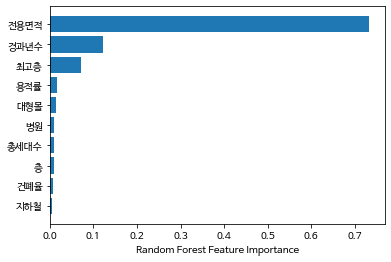

In [ ]:
## 랜포모델의 변수별 중요도(트리를 분할하는데 얼마나 기여했는가) 정렬하기
sorted_idx = RF_model.feature_importances_.argsort()

## 중요도에 대해 bar차트 그리기
plt.barh(X.columns[sorted_idx], RF_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# XGBoost

In [ ]:
import xgboost

## 전체 데이터를 학습데이터(80%)와 검증데이터(20%)로 나눔
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)
## xgb회귀 모델 생성(생성할 의사결정 나무 개수는 2000개)
XGB_model = xgboost.XGBRegressor(n_estimators=2000, random_state=41)
## 모델 적합시키기
XGB_model.fit(X_train,Y_train)

[04:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=2000, random_state=41)

In [ ]:
## 학습데이터에 대한 예측값
Train_Prediction = (XGB_model.predict(X_train))
## 검증데이터에 대한 예측값
Test_Prediction = (XGB_model.predict(X_test))

## 학습데이터의 평균절대오차 구하기
XGB_Train_MAE = round(np.mean(np.abs(Y_train-Train_Prediction)),3)
## 학습데이터의 퍼센트오차값 구하기
XGB_Train_MAPE = round((np.mean(np.abs((Y_train-Train_Prediction)/(Y_train)))*100),3)

## 검증데이터의 평균절대오차 구하기
XGB_Test_MAE = round(np.mean(np.abs(Y_test-Test_Prediction)),3)
## 검증데이터의 퍼센트오차값 구하기
XGB_Test_MAPE = round((np.mean(np.abs((Y_test-Test_Prediction)/(Y_test)))*100),3)

print("Mean Absolute Error for Train Set is : {:.3f}".format(XGB_Train_MAE))
print("Mean Absolute Percent Error for Train Set is : {:.3f} %".format(XGB_Train_MAPE))
print("Mean Absolute Error for Test Set is : {:.3f}".format(XGB_Test_MAE))
print("Mean Absolute Percent Error for Test Set is : {:.3f} %".format(XGB_Test_MAPE))

Mean Absolute Error for Train Set is : 0.025
Mean Absolute Percent Error for Train Set is : 0.239 %
Mean Absolute Error for Test Set is : 0.053
Mean Absolute Percent Error for Test Set is : 0.503 %


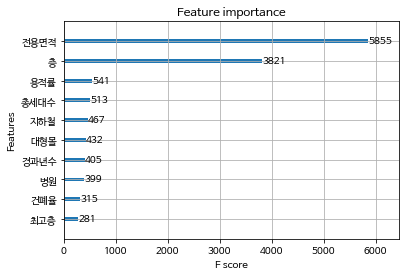

In [ ]:
## 변수별 중요도
xgboost.plot_importance(XGB_model)